In [1]:
import numpy as np, pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 1. Height - Weight Data 

In [3]:
df = pd.read_csv("medium_tshirt.csv")

In [4]:
df.shape

(200, 4)

In [5]:
df.head()

,Gender,Height,Weight,T-Shirt
0,Female,64.723877,138.085796,Not Medium
1,Male,67.272171,187.363366,Medium
2,Male,74.520972,216.533191,Not Medium
3,Female,65.880014,131.761443,Not Medium
4,Male,64.846301,157.718438,Medium


In [10]:
pd.crosstab(df["Gender"], 
            df["T-Shirt"],
    margins=True)

T-Shirt,Medium,Not Medium,All
Gender,,,
Female,48,51,99
Male,48,53,101
All,96,104,200


In [7]:
df[["Height", "Weight"]].mean()

Height     66.657306
Weight    163.563169
dtype: float64

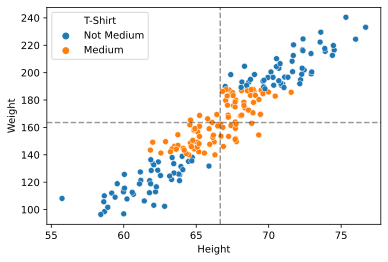

In [11]:
sns.scatterplot(data = df, x = "Height", y = "Weight", hue = "T-Shirt")

plt.axhline(y = df.Weight.mean(), linestyle = '--', color = 'black', alpha = 0.4)

plt.axvline(x = df.Height.mean(), linestyle = '--', color = 'black', alpha = 0.4)

In [12]:
# h = 67

# (67 - mu)/std = z score of h = 67

In [13]:
from sklearn.preprocessing import StandardScaler
SCALER = StandardScaler()

In [14]:
SCALER.fit_transform(df[["Height", "Weight"]])[:5]

array([[-0.47747926, -0.76562854],
       [ 0.15184675,  0.71522721],
       [ 1.94200886,  1.59181882],
       [-0.19195989, -0.95568368],
       [-0.4472453 , -0.17564183]])

In [15]:
df_std = pd.DataFrame(SCALER.fit_transform(df[["Height", "Weight"]]), 
                   columns = ["Height", "Weight"])

In [16]:
df_std.head()

,Height,Weight
0,-0.477479,-0.765629
1,0.151847,0.715227
2,1.942009,1.591819
3,-0.191960,-0.955684
4,-0.447245,-0.175642


In [17]:
df_std["T-Shirt"] = df["T-Shirt"].copy()

In [18]:
np.round(df_std.describe(),2)

,Height,Weight
count,200.00,200.00
mean,0.00,-0.00
std,1.00,1.00
min,-2.70,-2.02
25%,-0.71,-0.72
50%,0.10,-0.03
75%,0.69,0.77
max,2.48,2.31


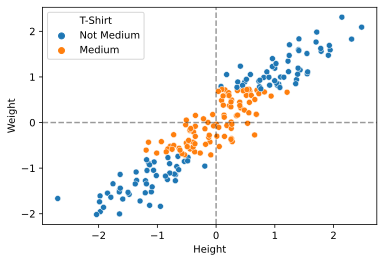

In [19]:
sns.scatterplot(data = df_std, x = "Height", 
                y = "Weight", hue = "T-Shirt")
plt.axhline(y = df_std.Weight.mean(), linestyle = '--', 
            color = 'black', alpha = 0.4)
plt.axvline(x = df_std.Height.mean(), linestyle = '--', 
            color = 'black', alpha = 0.4)

In [22]:
(-0.5)**2

0.25

In [23]:
df_std["Hsq"] = df_std["Height"]**2
df_std["Wsq"] = df_std["Weight"]**2

<AxesSubplot:xlabel='Hsq', ylabel='Wsq'>

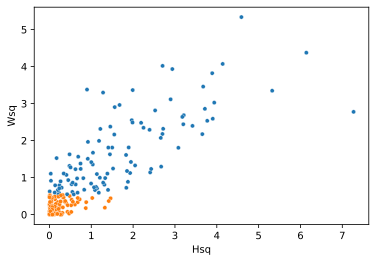

In [24]:
sns.scatterplot(data = df_std, x = "Hsq", y = "Wsq", 
                hue = "T-Shirt", size = 0.05,
                legend = False)